In [1]:
%load_ext autoreload
%autoreload 2
from utils.KMeans import *
from openml.datasets import list_datasets, get_datasets
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.datasets import make_blobs
import gc
from utils.helpers import load_datasets, clean_dataset
from matplotlib import rc
import matplotlib.pylab as plt
import matplotlib 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

# Set Latex font
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


# 1. Plot (ratio,k)

Text(0.5, 1.0, 'Evolution ratio between Assignment and Update time of executions')

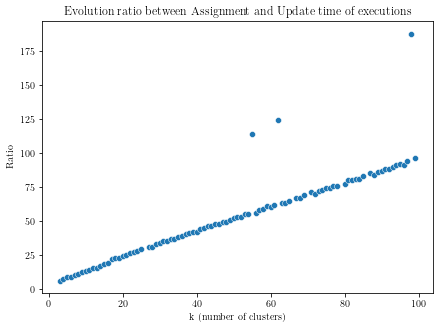

In [2]:
# Import dataset    
df = pd.read_csv('./data/measurements_1_1.csv')
# Compute ratio
df['ratio_AB_median'] = df['t_A_median']/df['t_B_median']
# Clean dataset
df_clean = clean_dataset(df)

# Plot

# Scatterplot
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(data=df_clean, x='n_clusters', y='ratio_AB_median', ax = ax)
ax.set_xlabel('k (number of clusters)')
ax.set_ylabel('Ratio')
ax.set_title('Evolution ratio between Assignment and Update time of executions')

# 2. Plot speculation vs basic kmeans

In [4]:
%load_ext autoreload
%autoreload 2
from utils.helpers import extend_df, extend_array, generate_clusters, timeseries_plot, load_datasets, generate_complex_datasets, estimate_optimal_centroids, load_downloaded_datasets, agg_and_plot, fit_linear_regression, find_bad_initalization
from utils.KMeans import KMeans, getLables, getCentroids, getAvgDist, KMeans_sketching
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.cluster import KMeans as KMeans_sk
import pickle
from time import process_time_ns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# load datasets
query = "NumberOfInstances > 10000 &\
         NumberOfInstances < 100000 &\
         NumberOfNumericFeatures > 5 &\
         NumberOfNumericFeatures < 50 &\
         NumberOfMissingValues == 0 &\
         NumberOfSymbolicFeatures == 0"

X_list, meta = load_datasets(query, n_datasets = 10, search = True, return_meta = True)

In [6]:
# Set parameter
seed = 0
np.random.seed(seed)
k = 8
num_iter = 50
subsample_size = 0.01
tol = 0

# Create dataset
dataset_index = 0
X = X_list[dataset_index]
n, d = X.shape

# Set output path
path = './data/sketching/plot_2.csv'

# Compute optimal centroids
opt_centroids = estimate_optimal_centroids(X, k, seed=0, n_init=50, tol=1e-6)

# Compute initial centroids
np.random.seed(seed)
initial_centroids = X[np.random.choice(n, k, replace=False)]  # (k, d)

# Speculation execution
labels, centroids = KMeans_sketching(X, k, num_iter=num_iter, seed=seed, subsample_size=subsample_size, save=True, path=path, measure=True, choose_best=False, resampling=True, trace=False, q = 0.5, tol=tol, resample_centroid=False, centroids=initial_centroids)

# Read .csv
df = pd.read_csv(path)

# Extend df to have num_iter rows
df = extend_df(df, num_iter)

# Define inertia_speculation
# df['inertia_speculation'] = df[['L_slow', 'L_fast']].min(axis=1)

# Estimate optimal centroids
opt_centroids = estimate_optimal_centroids(X, k, seed=0, n_init=50, tol=1e-6)

# Add L_opt
df['inertia_optimal'] = getAvgDist(X, opt_centroids)

df = df.rename(columns={"L_slow": "inertia_slow", "L_fast": "inertia_fast"})
# Add basic execution
# _, _, inertia_basic = KMeans(X, k, num_iter=num_iter, seed=seed, tol=tol, centroids=initial_centroids, measure_inertia=True)
# df['inertia_vanilla'] = extend_array(inertia_basic, num_iter)

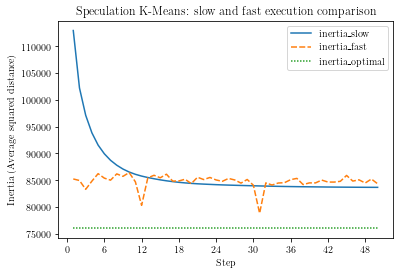

OpenML Dataset
Name..........: COMET_MC_SAMPLE
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-22 16:57:59
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/1956688/COMET_MC_SAMPLE.arff
OpenML URL....: https://www.openml.org/d/23395
# of features.: 6
# of instances: 89640

In [7]:
# Timeseries plot
timeseries_plot(df[['inertia_slow', 'inertia_fast', 'inertia_optimal']], xlabel='Step', ylabel='Inertia (Average squared distance)', title = 'Speculation K-Means: slow and fast execution comparison')

meta[dataset_index]

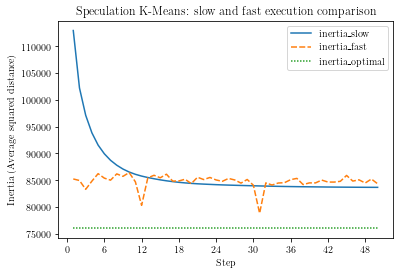

OpenML Dataset
Name..........: COMET_MC_SAMPLE
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-22 16:57:59
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/1956688/COMET_MC_SAMPLE.arff
OpenML URL....: https://www.openml.org/d/23395
# of features.: 6
# of instances: 89640

In [21]:
# Timeseries plot
timeseries_plot(df[['inertia_slow', 'inertia_fast', 'inertia_optimal']], xlabel='Step', ylabel='Inertia (Average squared distance)', title = 'Speculation K-Means: slow and fast execution comparison')

meta[dataset_index]

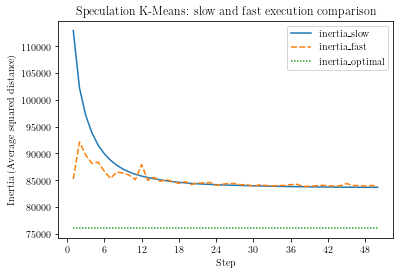

OpenML Dataset
Name..........: COMET_MC_SAMPLE
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-22 16:57:59
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/1956688/COMET_MC_SAMPLE.arff
OpenML URL....: https://www.openml.org/d/23395
# of features.: 6
# of instances: 89640

In [23]:
# Timeseries plot
timeseries_plot(df[['inertia_slow', 'inertia_fast', 'inertia_optimal']], xlabel='Step', ylabel='Inertia (Average squared distance)', title = 'Speculation K-Means: slow and fast execution comparison')

meta[dataset_index]

---

In [17]:
# Set parameter
seed = 0
np.random.seed(seed)
k = 8
num_iter = 50
subsample_size = 0.01
tol = 0

# Create dataset
dataset_index = 0
X = X_list[dataset_index]
n, d = X.shape

# Set output path
path = './data/sketching/plot_2.csv'

# Compute optimal centroids
opt_centroids = estimate_optimal_centroids(X, k, seed=0, n_init=50, tol=1e-6)

# Compute initial centroids
np.random.seed(seed)
initial_centroids = X[np.random.choice(n, k, replace=False)]  # (k, d)

# Speculation execution
labels, centroids = KMeans_sketching(X, k, num_iter=num_iter, seed=seed, subsample_size=subsample_size, save=True, path=path, measure=True, choose_best=True, resampling=True, trace=False, tol=tol, resample_centroid=False, centroids=initial_centroids)

# Read .csv
df = pd.read_csv(path)

# Extend df to have num_iter rows
df = extend_df(df, num_iter)

# Define inertia_speculation
df['inertia_speculation'] = df[['L_slow', 'L_fast']].min(axis=1)

# Estimate optimal centroids
opt_centroids = estimate_optimal_centroids(X, k, seed=0, n_init=50, tol=1e-6)

# Add L_opt
df['inertia_optimal'] = getAvgDist(X, opt_centroids)

# Add basic execution
_, _, inertia_basic = KMeans(X, k, num_iter=num_iter, seed=seed, tol=tol, centroids=initial_centroids, measure_inertia=True)
df['inertia_vanilla'] = extend_array(inertia_basic, num_iter)

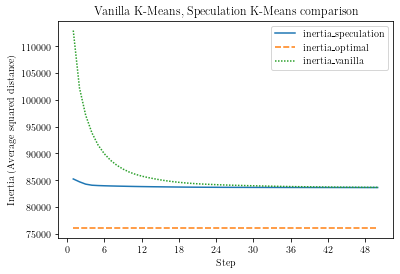

OpenML Dataset
Name..........: COMET_MC_SAMPLE
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-22 16:57:59
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/1956688/COMET_MC_SAMPLE.arff
OpenML URL....: https://www.openml.org/d/23395
# of features.: 6
# of instances: 89640

In [18]:
# Timeseries plot
timeseries_plot(df[['inertia_speculation', 'inertia_optimal', 'inertia_vanilla']], xlabel='Step', ylabel='Inertia (Average squared distance)', title = 'Vanilla K-Means, Speculation K-Means comparison')

meta[dataset_index]

https://www.openml.org/d/23395
The dataset used is an ARFF dataset called COMET_MC_SAMPLE, version 2, uploaded on April 22nd, 2016. It is publicly available and can be downloaded from the URL provided. It contains 6 features and 89640 instances, and can be found on OpenML with the ID 23395.

# Fix

In [101]:
def getCentroids_prev(X, labels, k):
    group_counts = np.bincount(labels, minlength=k)[:, None]
    fn = lambda w: np.bincount(labels, weights=w, minlength=k)
    return np.apply_along_axis(fn, 0, X) / group_counts

In [100]:
def getCentroids_cur(X, labels, k, old_centroids):
    centroids = np.copy(old_centroids)
    group_counts = np.bincount(labels, minlength=k)[:, None]
    not_empty_clusters = (group_counts!=0)
    k_not_empty = not_empty_clusters.sum()
    fn = lambda w: np.bincount(labels, weights=w, minlength=k_not_empty)
    centroids[not_empty_clusters.reshape(-1)] = np.apply_along_axis(fn, 0, X) / group_counts[not_empty_clusters, None]
    return centroids

In [102]:
_, _, X, _ = generate_clusters(n_clusters=3, d=5, n=100, seed = None, plot = False)
k = 5
n, d = X.shape
# Compute initial centroids
seed = 1
np.random.seed(seed)
initial_centroids = X[np.random.choice(n, k, replace=False)]  # (k, d)

In [103]:
labels = getLables(X, initial_centroids)

In [104]:
centroids1 = getCentroids_prev(X, labels, k)

In [105]:
centroids2 = getCentroids_cur(X, labels, k, initial_centroids)

In [106]:
def equal(v1, v2):
    return np.array_equal(v1, v2)

In [107]:
equal(centroids1, centroids2)

True

In [109]:
equal(centroids2, initial_centroids)

False